<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ellaesalex/blob/main/CursoIBM-2/Data_Analysis_with_Python_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Data Analysis with Python (IBM) - Modulo 5**
Maestría en Inteligencia Artificial Aplicada

Curso: Data Analysis with Python

Tecnológico de Monterrey


**Profesor Titular:**
- María de la Paz Rico Fernández

**Profesor Tutor:**
- Roberto Antonio Guevara González

**Nombre de la estudiante:**
- Alejandra Mendoza Flores 

**Matricula:**
- A01793032


# **Module 5 – Model Evaluation**

### **Model Evaluation**

- La evaluación del modelo nos dice cómo funciona nuestro modelo en el mundo real
- In-sample evaluation: Que tan bien nuestro modelo se ajusta a los datos ya proporcionados para entrenar. No nos da una estimación de qué tan bien el modelo entrenado puede predecir nuevos datos
- Para entrenar el modelo es necesario dividir los datos em sample data y training data
- Test data son usados out-of-sample data, son utilizados para aproximar el rendimiento del modelo real
- La mayor parte de los datos se usa para entrenamiento,se usa para construir un modelo y descubrir relaciones predictivas
- Test data: Se usa para evaluar el rendimiento del modelo


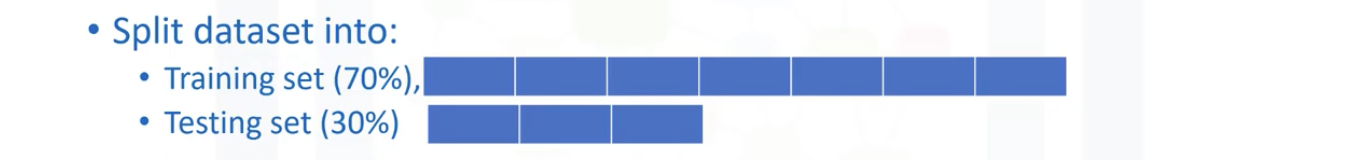

- Al completar la **prueba** de nuestro modelo, debemos usar todos los datos para **entrenar** el modelo


**sci-kit learn package - Ttrain test split function**
- Divide aleatoriamente un conjunto de datos en subconjuntos de entrenamiento y prueba
```
x_train, x_test, y_train, y_test = train_test_dplit(x_data, y_data, test_size=0.3, random_state=0)
```
- y_data:  Parámetro de entrada, la variable de destino
- x_data: La lista de variables predictoras
- La salida es una matriz
  - x_train y y_train: Los subconjuntos para el entrenamiento
  - x_test y y_x_test: Los subconjuntos para la prueba
- test_size=0.3: Tamaño del conjunto de prueba (test)
- random_state: Es una semilla aleatoria para aleatorio división de conjuntos de datos

**Error de generalización**
- Es una medida de qué tan bien nuestros datos predicen cosas nunca antes vistas
- Rojo: Distribución de los valores reales
- Azul: Valores previstos en una regresión lineal



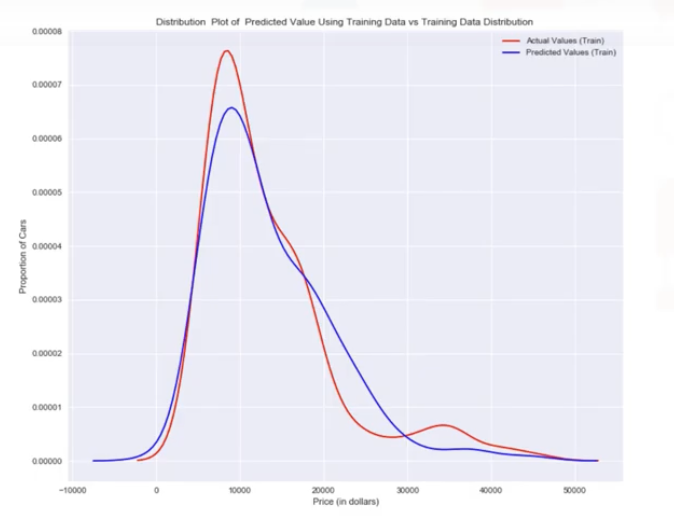

**Validación cruzada**
- Se utiliza cuando todas nuestras estimaciones de error están relativamente juntas, pero están más lejos del verdadero rendimiento de generalización, y se quiere resolver dicho problema
- Uso del promedio como estimación de error fuera de la muesta
- La métrica de evaluación depende del modelo
- Devuelve un valor de puntuación para indicarnos la validación cruzada resultado

**R-squared**
- función cross_val_score()
- La forma más sencilla de aplicar la validación 
- Realiza múltiples evaluaciones 'fuera de la muestra'
- sklearn
- Se usa la función cross_val_score(). 

```
scores = cross_val_score(lr, x_data, y_data, vc=3)
```
- lr: de entrada es el tipo de modelo que estamos usando para hacer la validación cruzada
- x_data: Los datos de la variable predictora
- y y_data: La variable objetivo
- cv: Gestiona el número de particiones iguales
- La función devuelve una matriz de puntuaciones, una para cada partición que se eligió como conjunto de prueba

```
np.mean(scores)
```
- Promedia el resultado

**cross_val_predict()**
- Predicción real del modelo antes de que se calculen los valores con R-squared

```
yhat = cross_val_predict(lr2e, x_data, y_data, cv=3)
```



### **Overfitting, Underfitting and Model Selection**

- El objetivo de la selección del modelo es determinar el orden del polinomio para proporcionar el mejor estimación de la función y x
- Under-fitting: Cuando el modelo es demasiado simple para ajustarse a los datos.
- Over-fitting: Cuando el modelo es demasiado flexible y se ajusta al ruido en lugar que la función

**Plot of the mean square error**
- Eje horizontal: Representa el orden del polinomio; el eje vertical es la mean square error
- Training Error: Disminuye con el orden del polinomio
- Test Error: Mejor medio para estimar el error de un polinomio, disminuye asta que se determina el mejor orden del polinomio

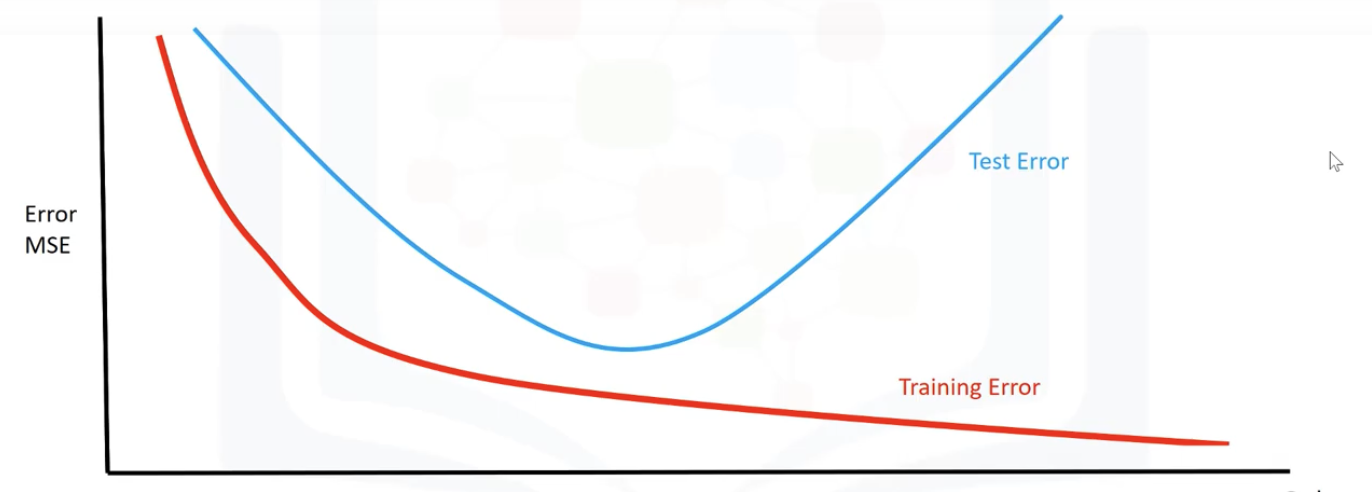

### **Ridge Regression**

- Evita el sobreajuste
- Los datos reales tienen valores atípicos
- Controla la magnitud de estos coeficientes polinómicos introduciendo
el parámetro alfa

**Alfa**
- Es un parámetro que seleccionamos antes de ajustar o entrenar el modelo
- A medida que aumenta alfa, los parámetros se hacen más pequeños.
- Demasiado grande: Los coeficientes se aproximarán a cero y se ajustarán por debajo de los datos
- Para sleleccionar su valor se realiza una validación cruzada
- Valores:
  - Cero: El sobreajuste es evidente
  - Igual a 0,001: El sobreajuste comienza a disminuir
  - Igual a 0,01: La función estimada sigue la función real
  - Igual a 1: Vemos los primeros signos de subajuste. La función estimada no tiene suficiente flexibilidad.
  - Igual a 10: Vemos un ajuste insuficiente extremo; ni siquiera rastrea los dos puntos


```
from sklearn.linear model import Ridge

RigeModel = Ridge(alpha=0.1)
RigeModel.fit(X,y)
Yhat=RigeModel.predict(X)
```
- alpha=0.1: Argumentos del contructos
- .fit(X,y): Entrenar el modelo
- .predict(X): Hacer predicicón




### **Grid Search**

- Nos permite escanear a través de múltiples parámetros gratuitos con pocas líneas de código
- Parámetros: Son parte de la adaptación o proceso de formación (hiperparámetros)
- Validación cruzada con Scikit-learn
- Toma el modelo o los objetos que le gustaría entrenar y diferentes valores de los hiperparámetros.
- Calcula el error cuadrático medio o R-squared para varios valores de hiperparámetros, ello permite elegir los mejores valores
- Los atributos de un objeto también se denominan parámetros

```
parameters = [{'alpla': [1, 10, 100, 1000]}]
```
- 'alpla': Nombre del parámetro libre
- [1, 10, 100, 1000]: El valor del diccionario son los diferentes valores del parámetro libre
- Grid Search: Asume el método de puntuación, en este caso R-squared, el número de pliegues, el modelo u objeto, y los valores de los parámetros libres
- Salidas: Las diferentes puntuaciones para diferentes valores de parámetros libres

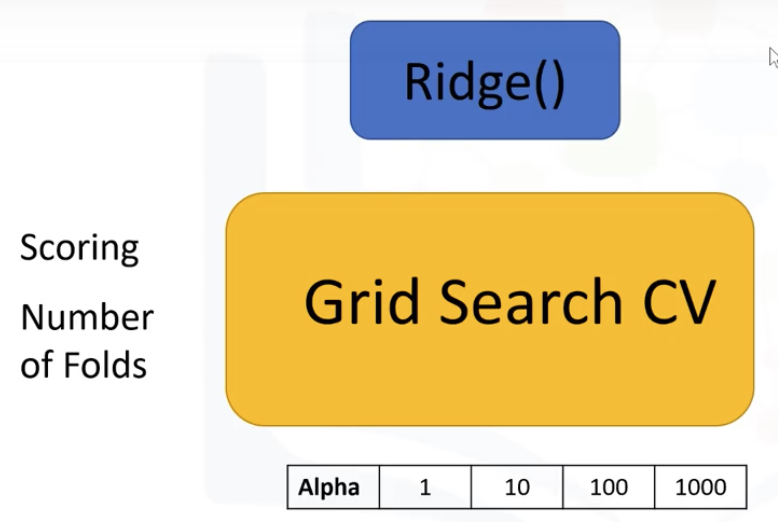

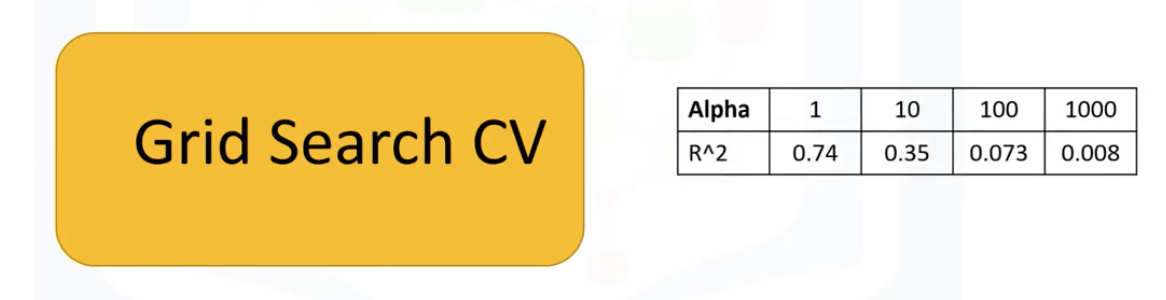

```
from sklearn.linear_ model import Ridge
from sklearn.model_ selection import GridSearchCV

parameters1 = [('alpha':[0.001,0.1,1,10,100,1000,10000,100000,100000]}]
RR=Ridge()
Grid1= GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']].y_data)
Grid1.best estimator

scores = Grid1.cv results_
scores['mean test score']
```

- [0.001,0.1,1,10,100,1000,10000,100000,100000] : Diccionario
- Ridge() : Crea un Grid Search
- Grid1= GridSearchCV(RR, parameters1, cv=4) : Objeto cv de Grid Search, el los valores de los parámetros y el número de pliegues
- Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']].y_data) : Ajustar el objeto
- .best estimator : Encuentra los mejores valores para los parámetros libres usando el mejor estimador del atributo
- scores = Grid1.cv results_ & scores['mean test score'] : Obtener información como la puntuación media de los datos de validación utilizando el atributo resultado cv.


- Ventajas: 
  - Rapidez con la que podemos probar múltiples parámetros
  - Puede normalizar datos

### **Lab 5**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [3]:
df = pd.read_csv(path)

In [5]:
df.head()

Unnamed: 0  Unnamed: 0.1  symboling  normalized-losses         make  \
0           0             0          3                122  alfa-romero   
1           1             1          3                122  alfa-romero   
2           2             2          1                122  alfa-romero   
3           3             3          2                164         audi   
4           4             4          2                164         audi   

  aspiration num-of-doors   body-style drive-wheels engine-location  ...  \
0        std          two  convertible          rwd           front  ...   
1        std          two  convertible          rwd           front  ...   
2        std          two    hatchback          rwd           front  ...   
3        std         four        sedan          fwd           front  ...   
4        std         four        sedan          4wd           front  ...   

   compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg    price  \
0                9.0       111.0    5000.0        21           27  13495.0   
1                9.0       111.0    5000.0        21           27  16500.0   
2                9.0       154.0    5000.0        19           26  16500.0   
3               10.0       102.0    5500.0        24           30  13950.0   
4                8.0       115.0    5500.0        18           22  17450.0   

  city-L/100km  horsepower-binned diesel  gas  
0    11.190476             Medium      0    1  
1    11.190476             Medium      0    1  
2    12.368421             Medium      0    1  
3     9.791667             Medium      0    1  
4    13.055556             Medium      0    1  

[5 rows x 31 columns]

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [9]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

**Part 1: Training and Testing**

In [10]:
y_data = df['price']

In [11]:
x_data=df.drop('price',axis=1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [15]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [17]:
lre=LinearRegression()

In [ ]:
lre.fit(x_train[['horsepower']], y_train)

In [ ]:
lre.score(x_test[['horsepower']], y_test)

In [ ]:
lre.score(x_train[['horsepower']], y_train)

In [18]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [20]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [21]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [22]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [23]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [24]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [26]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

**Part 2: Overfitting, Underfitting and Model Selection**

In [27]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [28]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [29]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


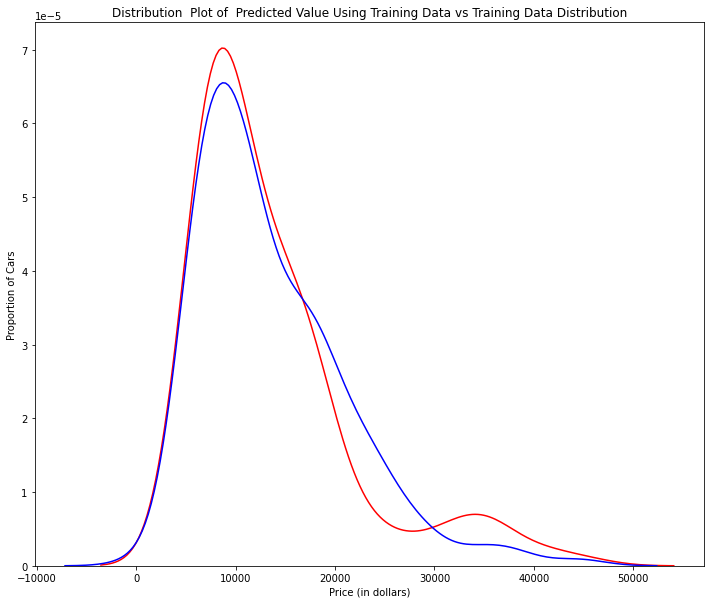

In [31]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


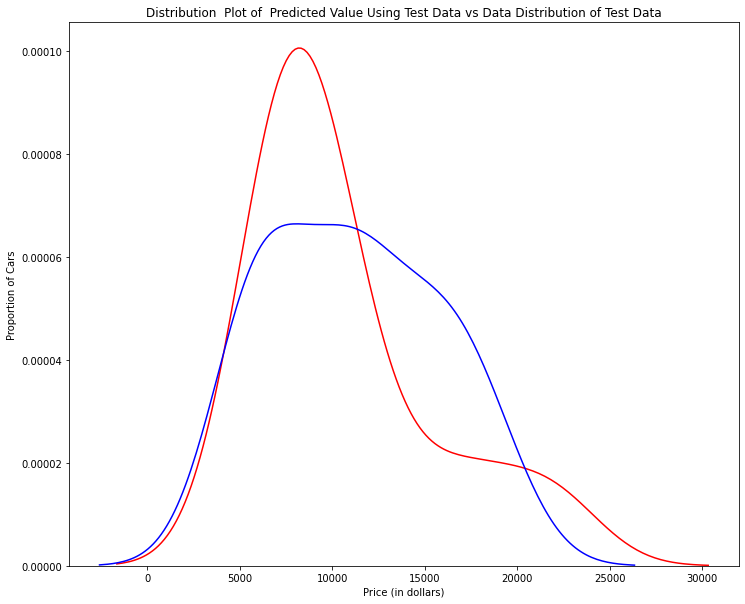

In [32]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [35]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [36]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [37]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [38]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


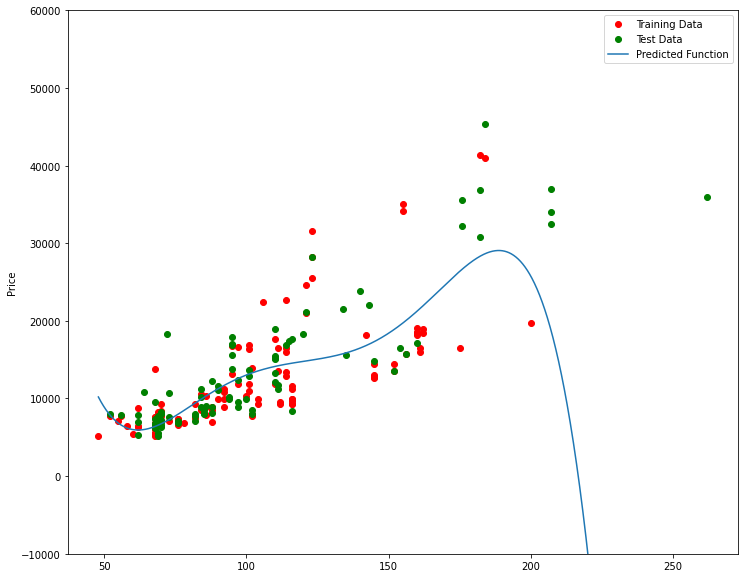

In [39]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [40]:
poly.score(x_train_pr, y_train)

0.556771690212023

In [41]:
poly.score(x_test_pr, y_test)

-29.87134030204415

Text(3, 0.75, 'Maximum R^2 ')

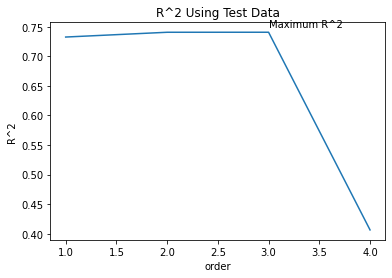

In [42]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [43]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [44]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [45]:
pr1=PolynomialFeatures(degree=2)

In [46]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [47]:
x_train_pr1.shape

(110, 15)

In [48]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

In [50]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [52]:
RigeModel=Ridge(alpha=1)

In [53]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [54]:
yhat = RigeModel.predict(x_test_pr)

In [55]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [58]:


Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:06<00:00, 148.66it/s, Test Score=0.564, Train Score=0.859]


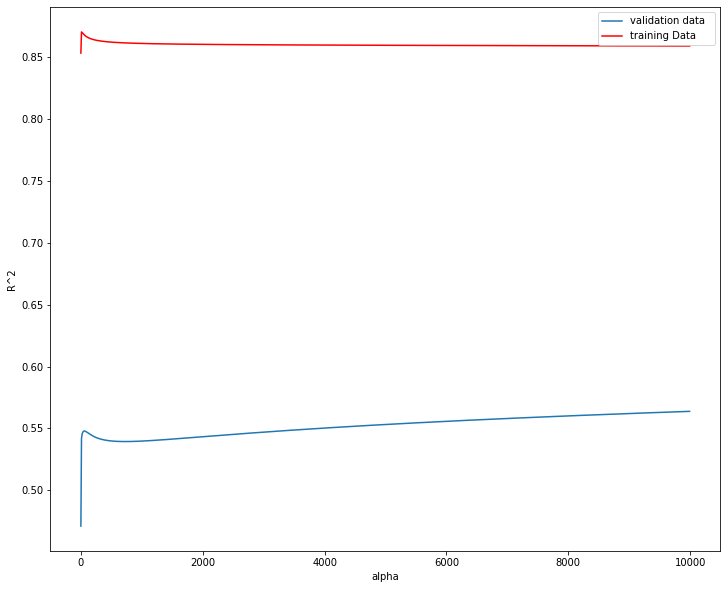

In [59]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [60]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

In [62]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [63]:
RR=Ridge()
RR

Ridge()

In [64]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [65]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [66]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [67]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

### **Graded Review Questions**

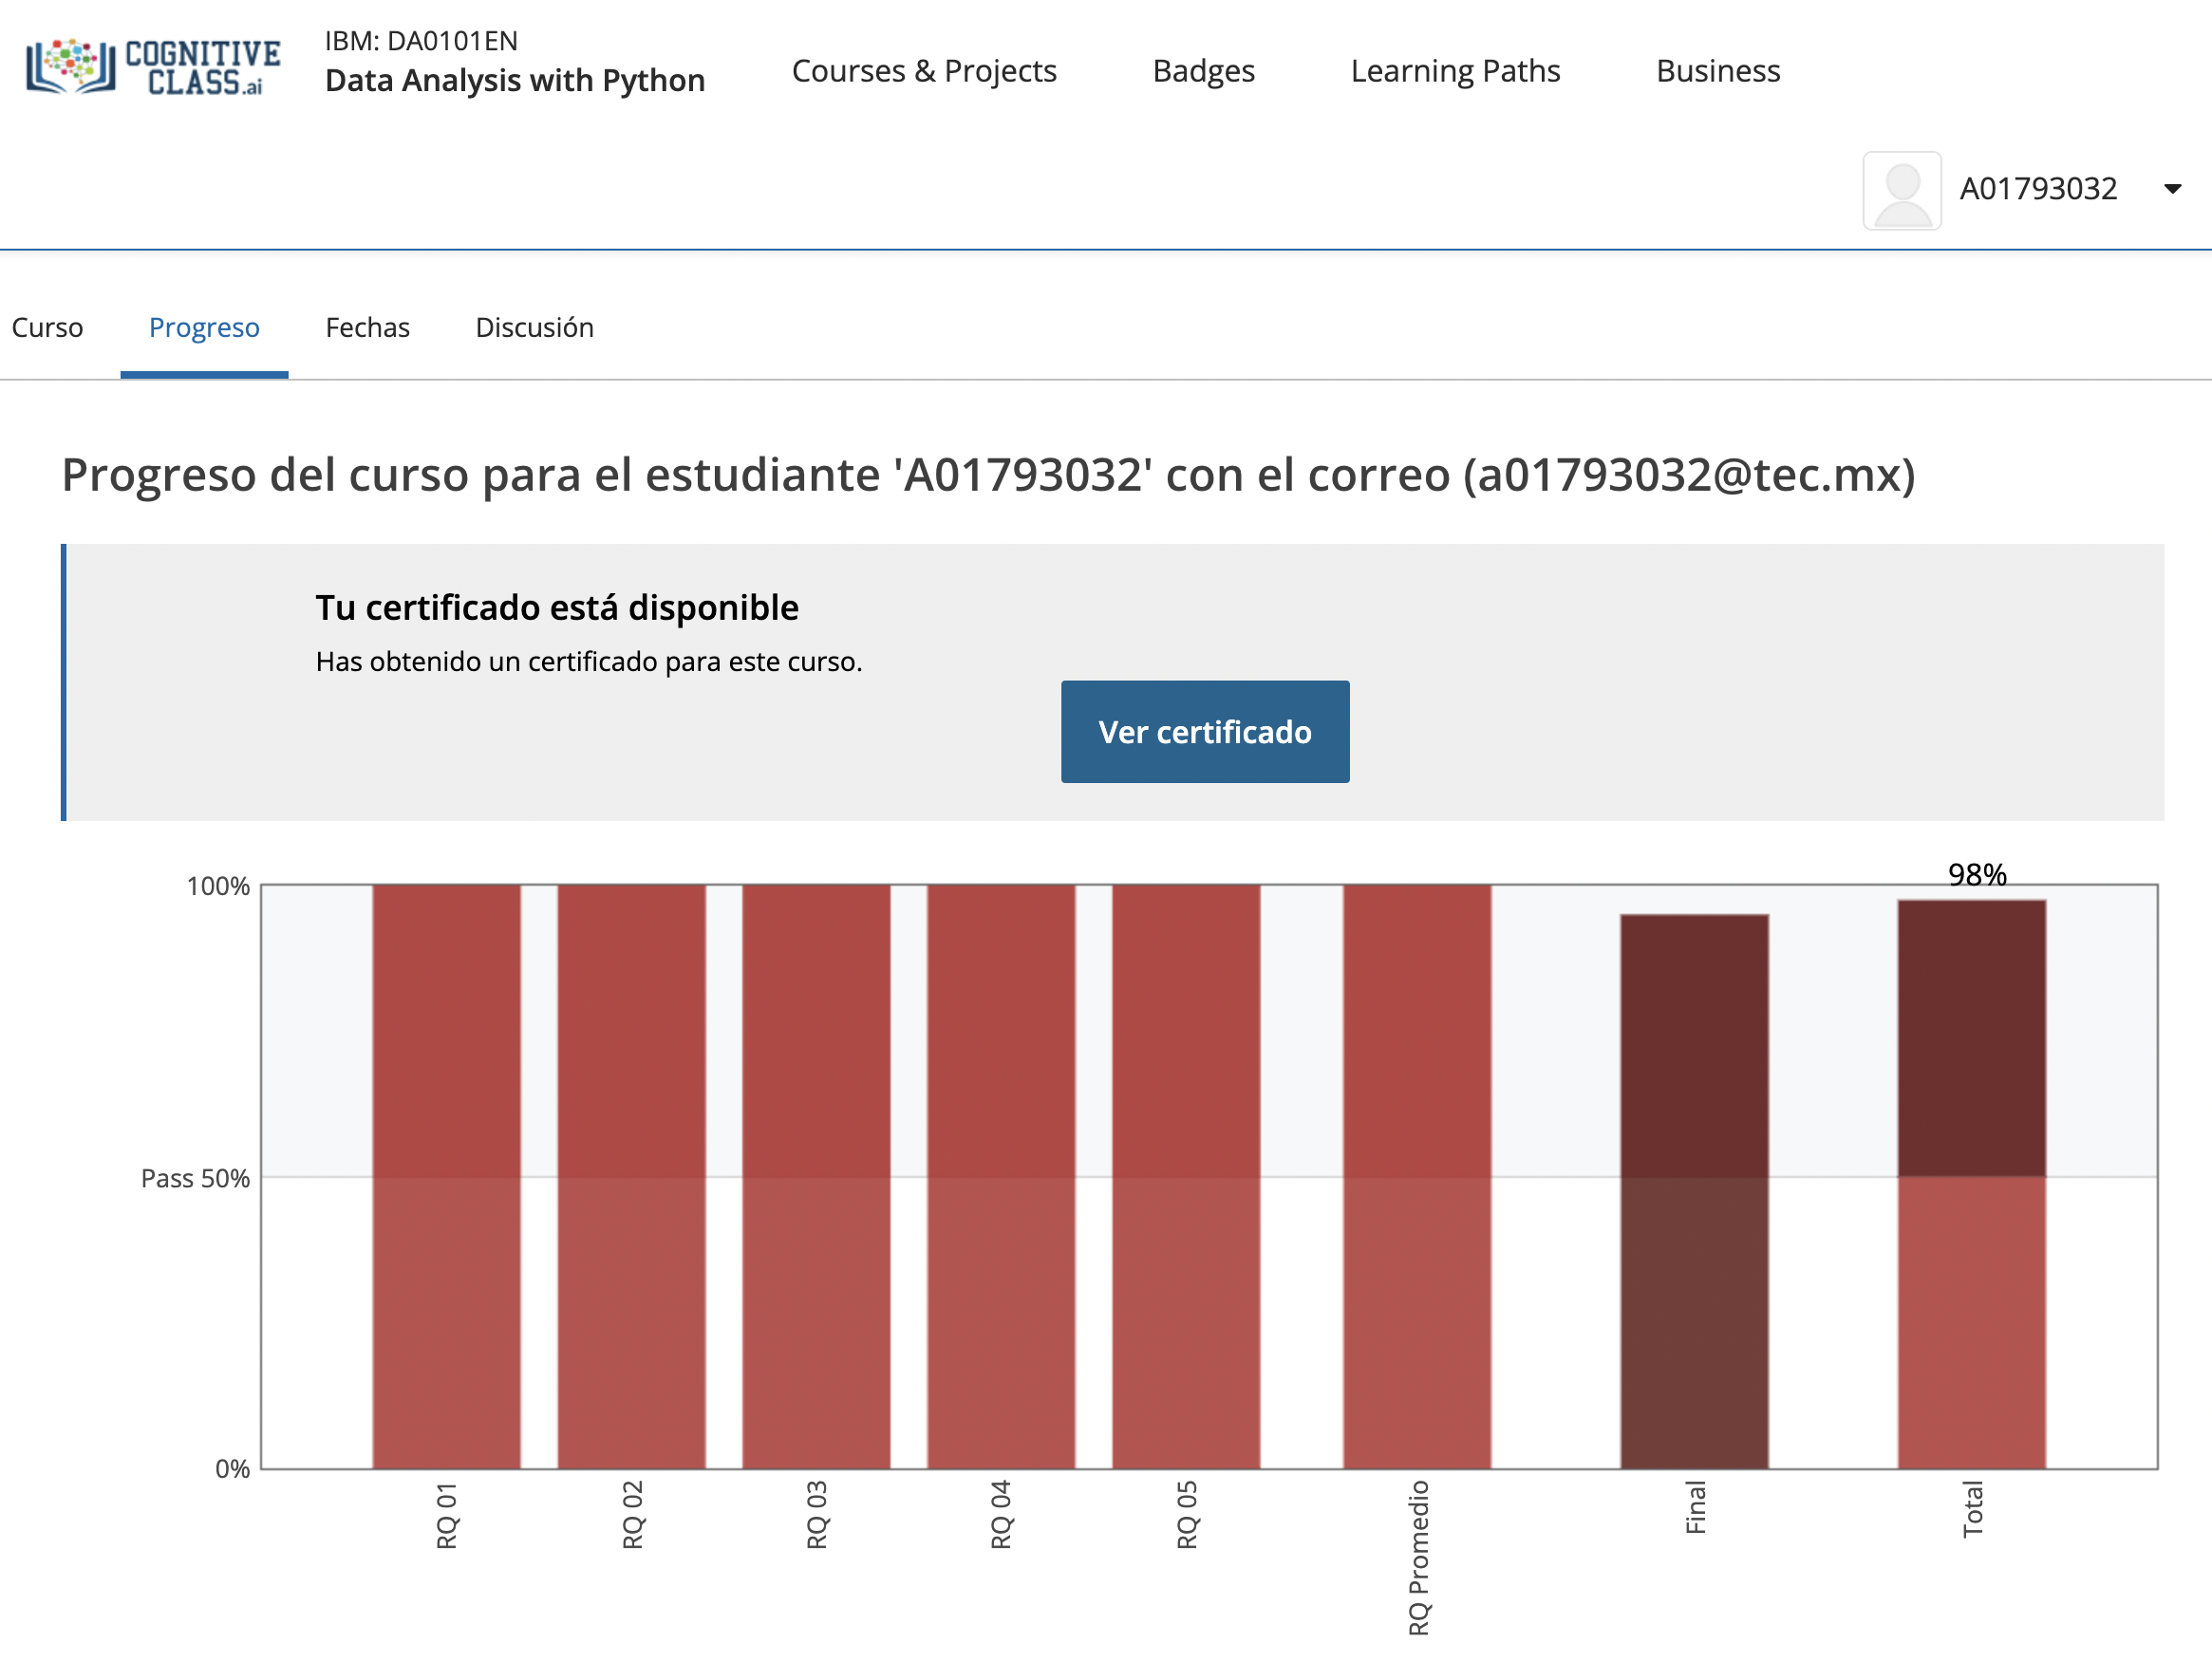

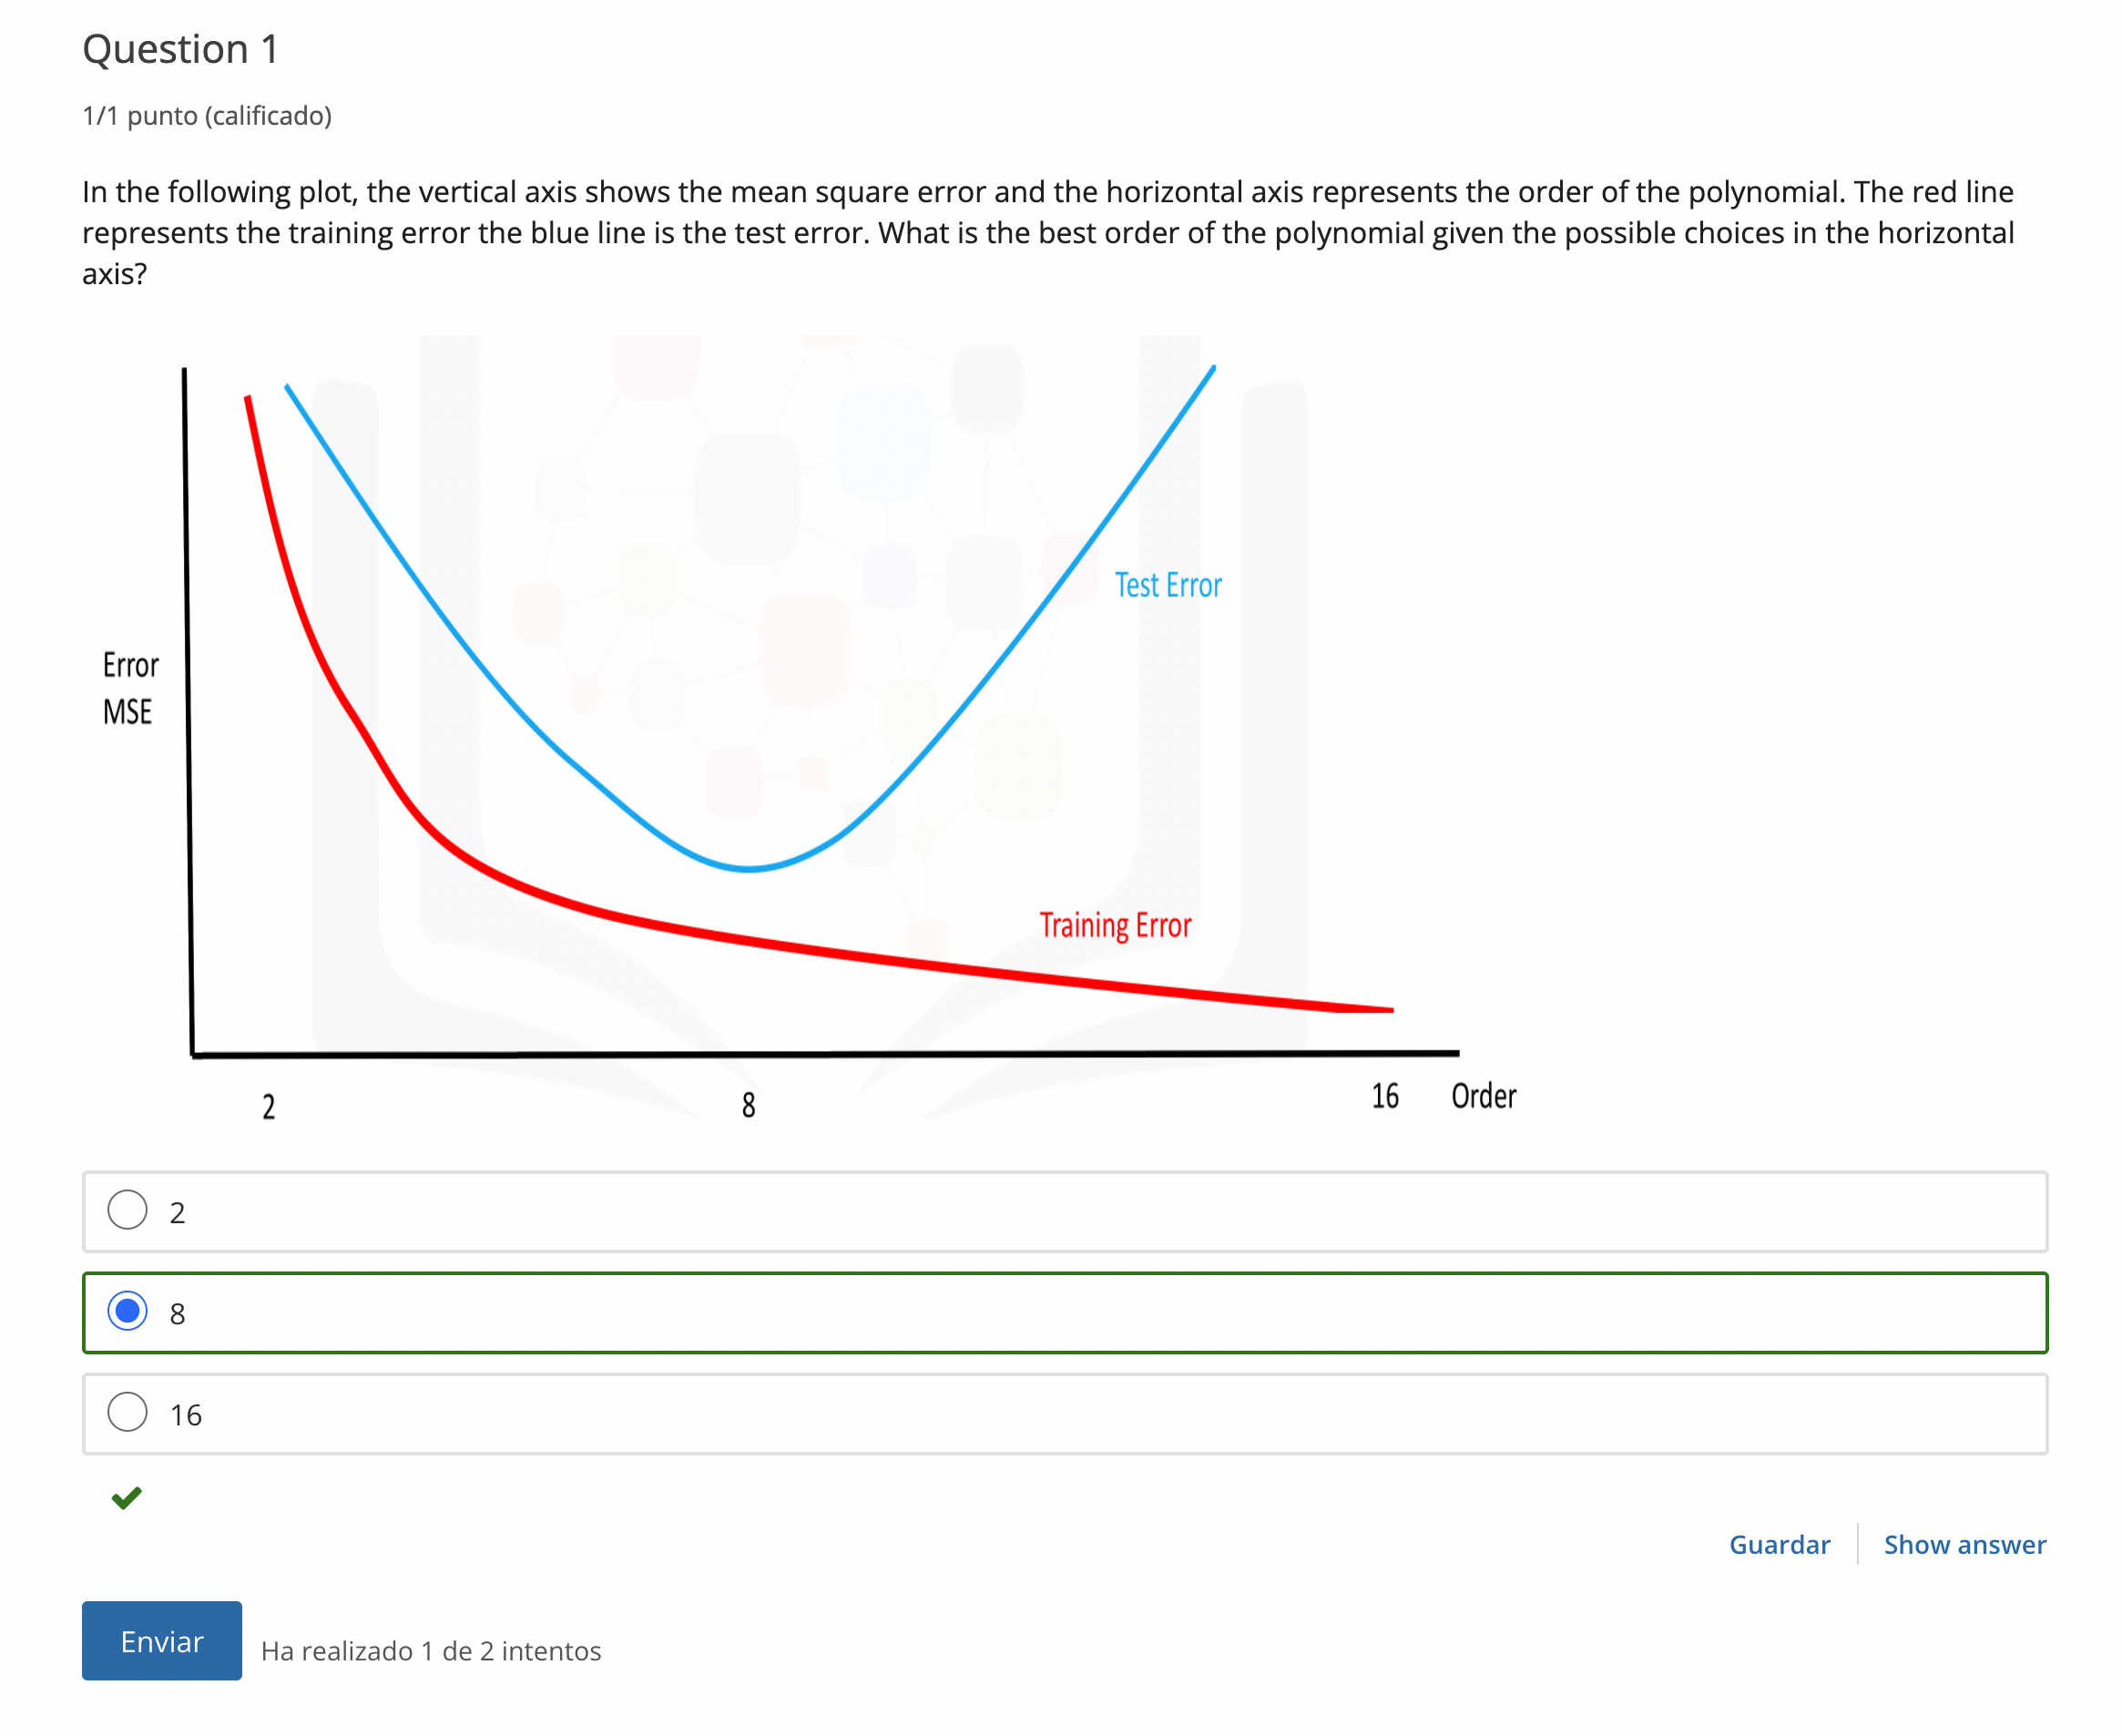

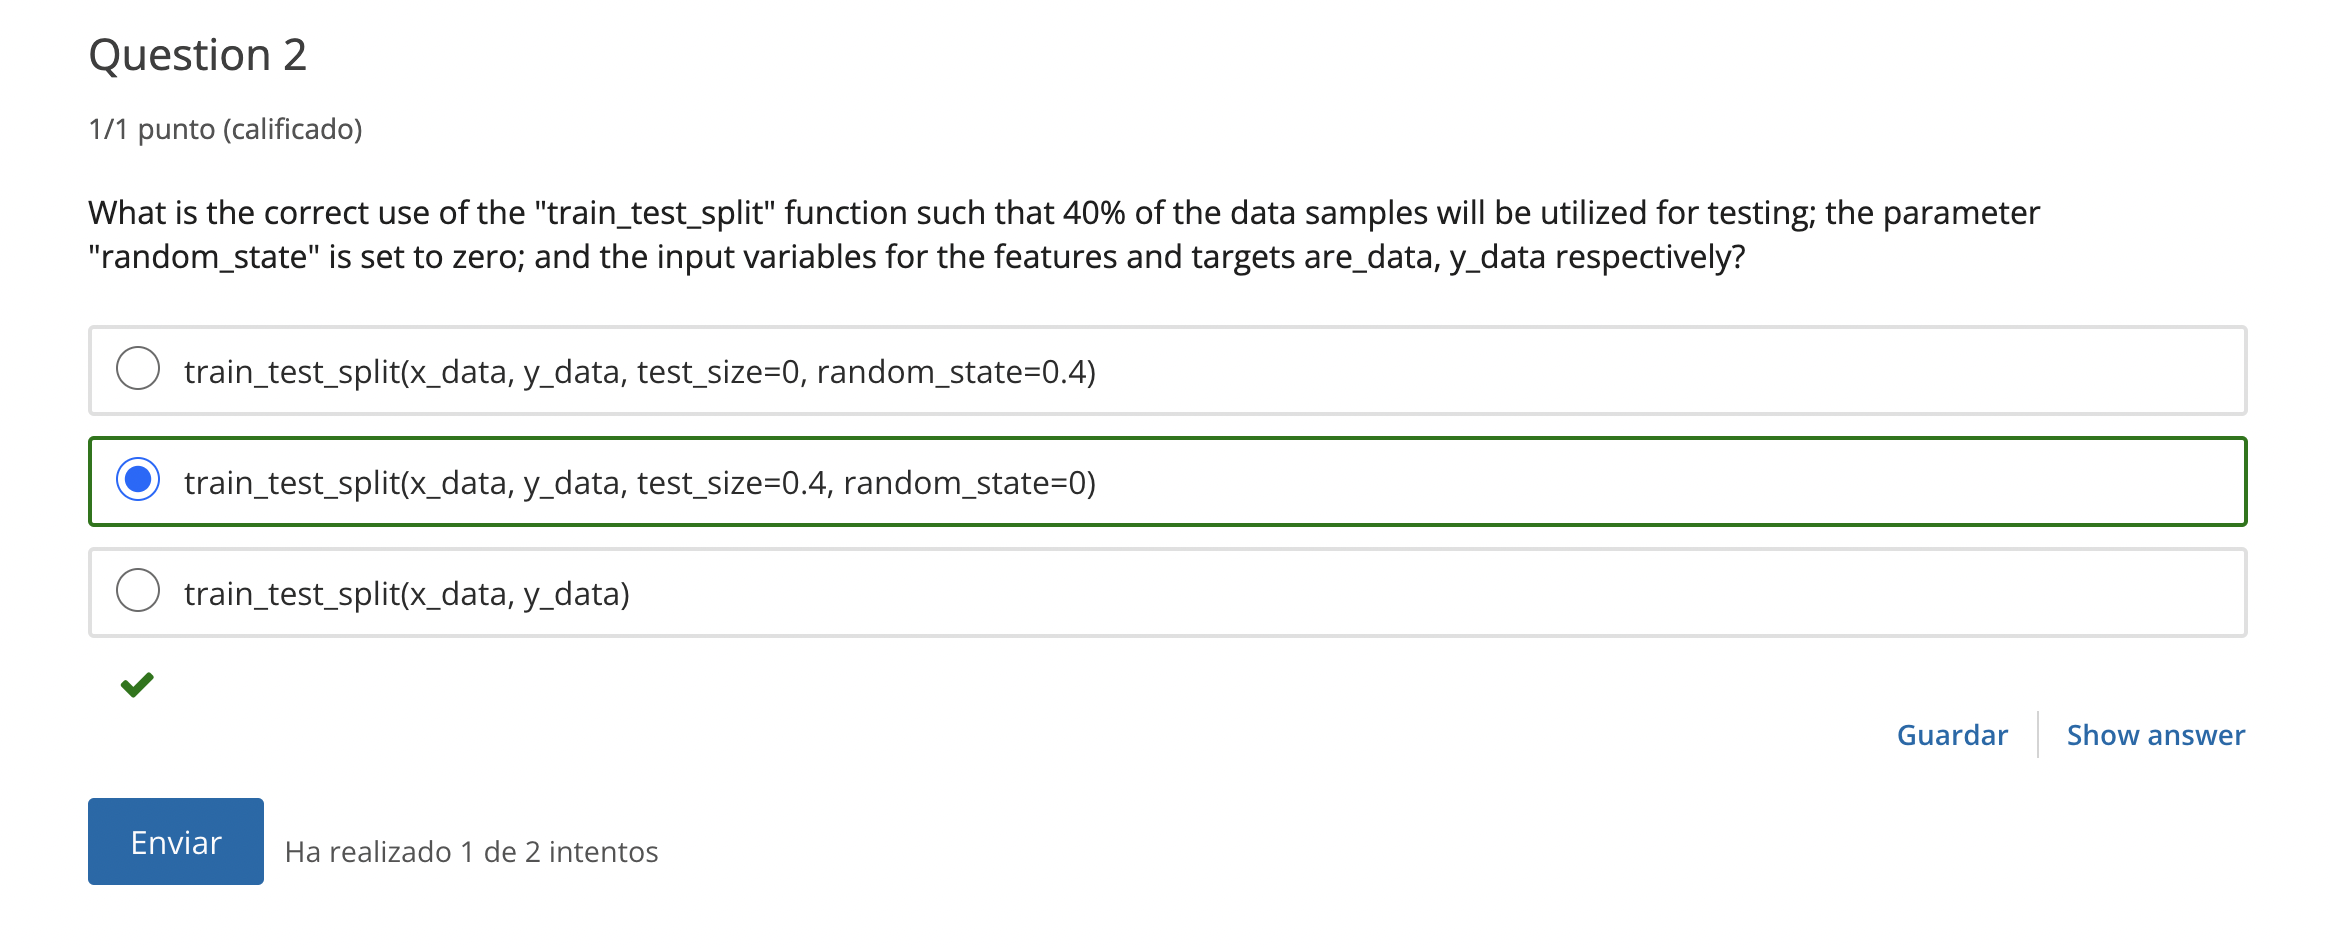

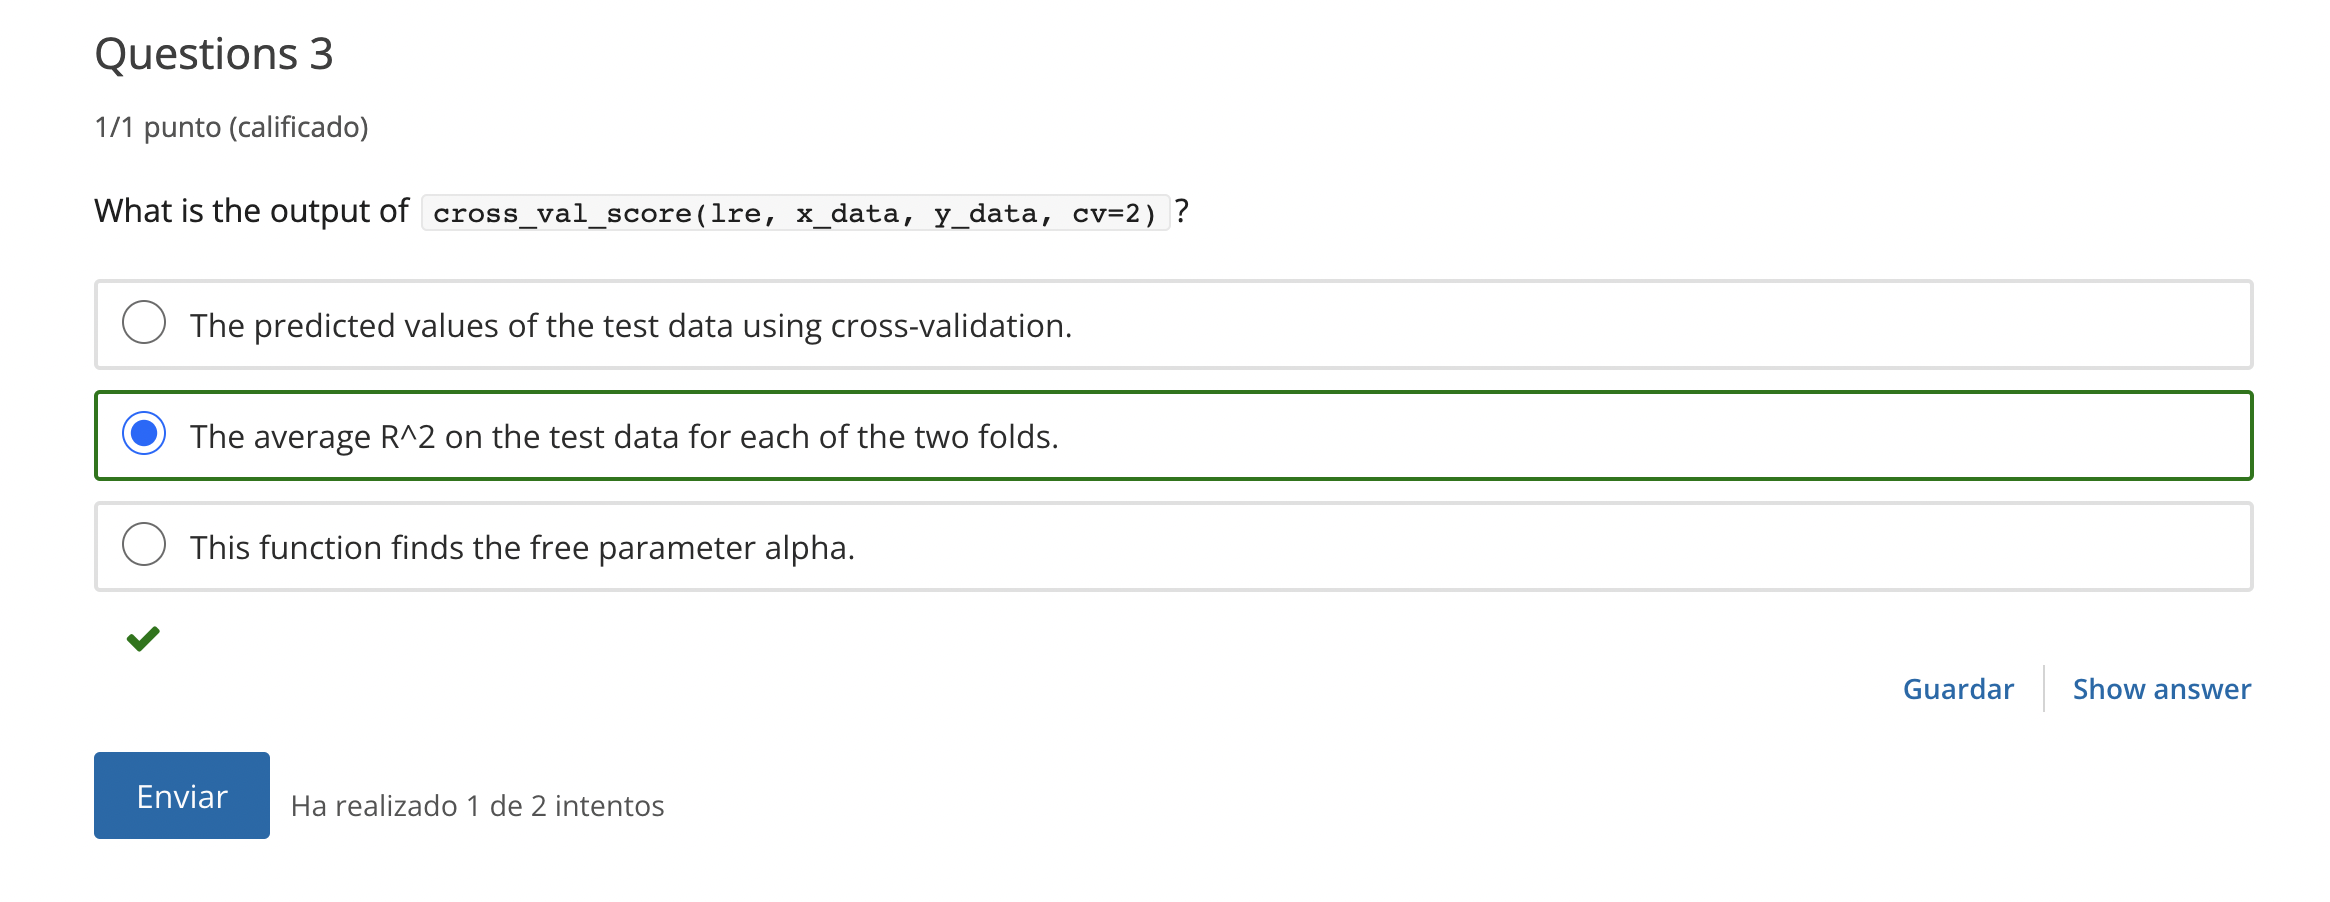

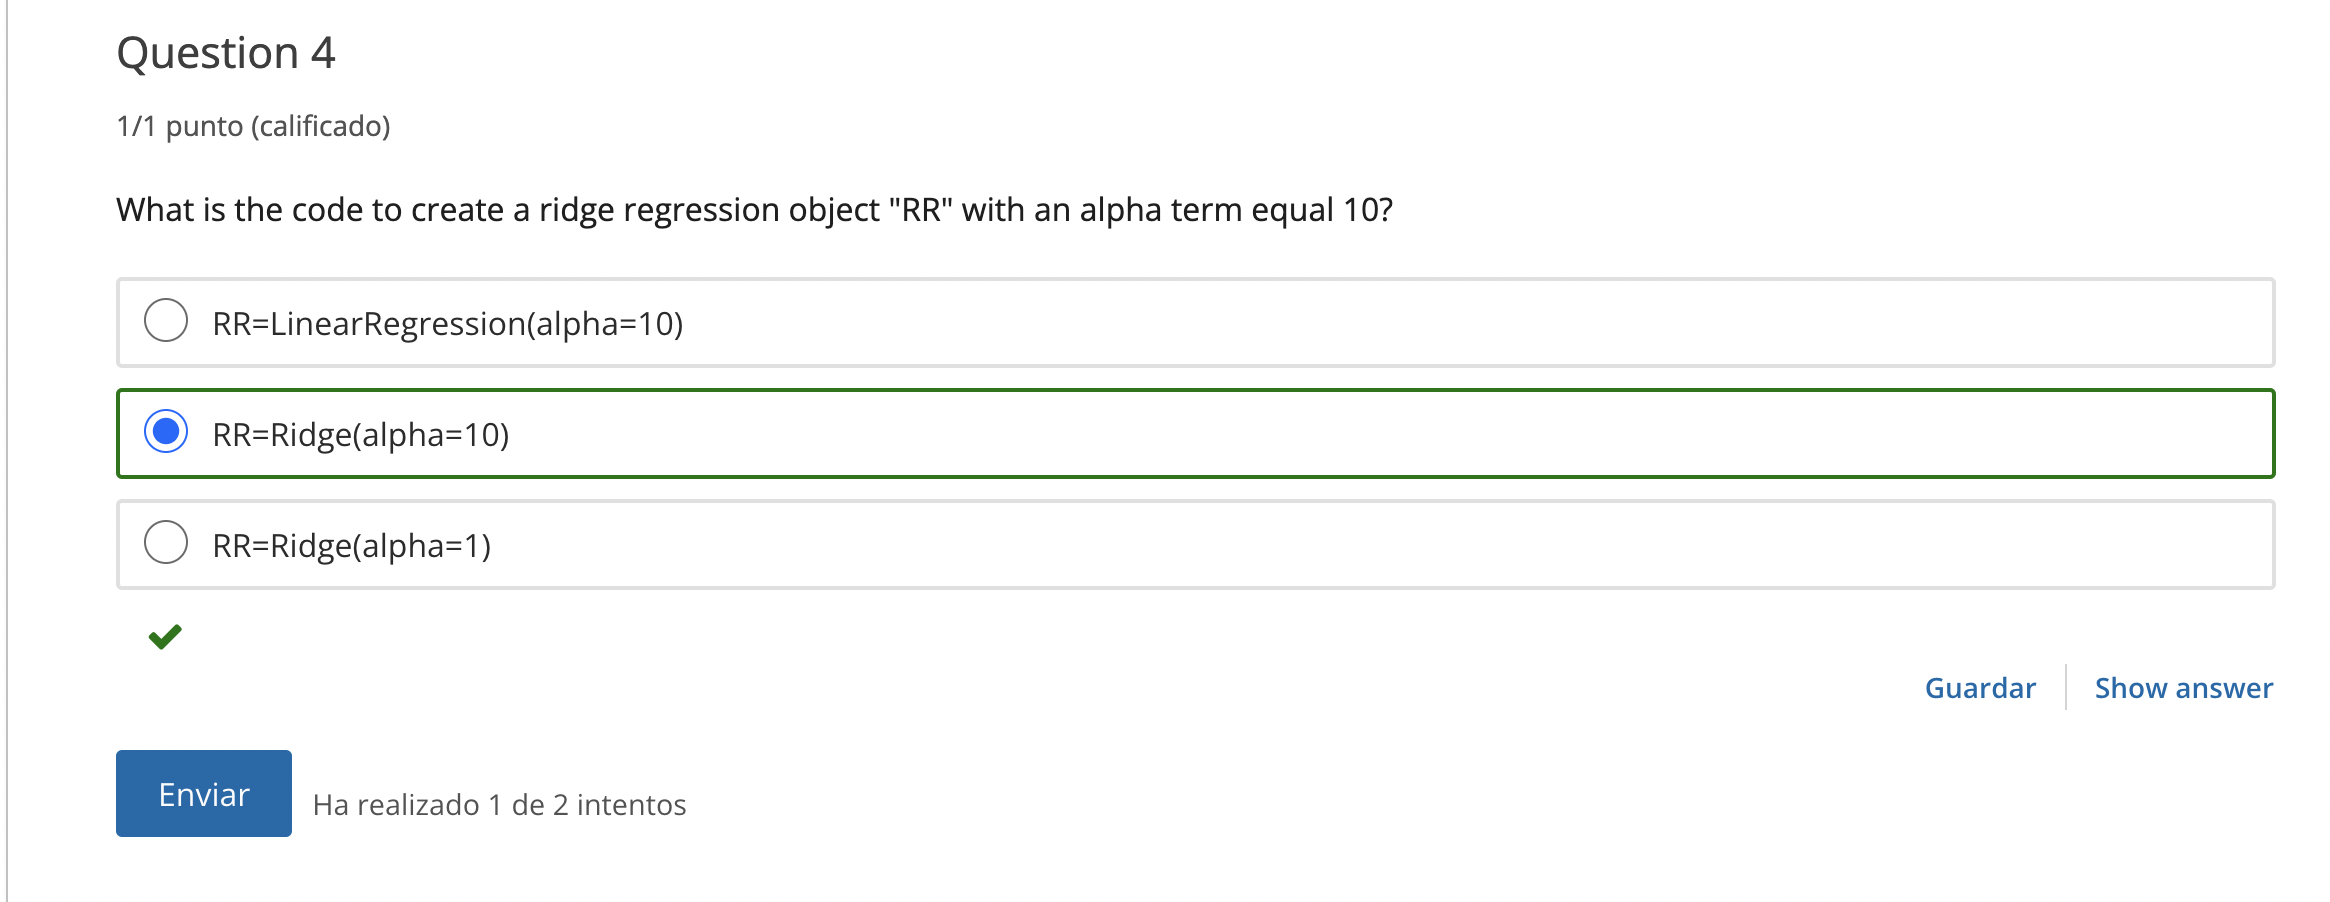

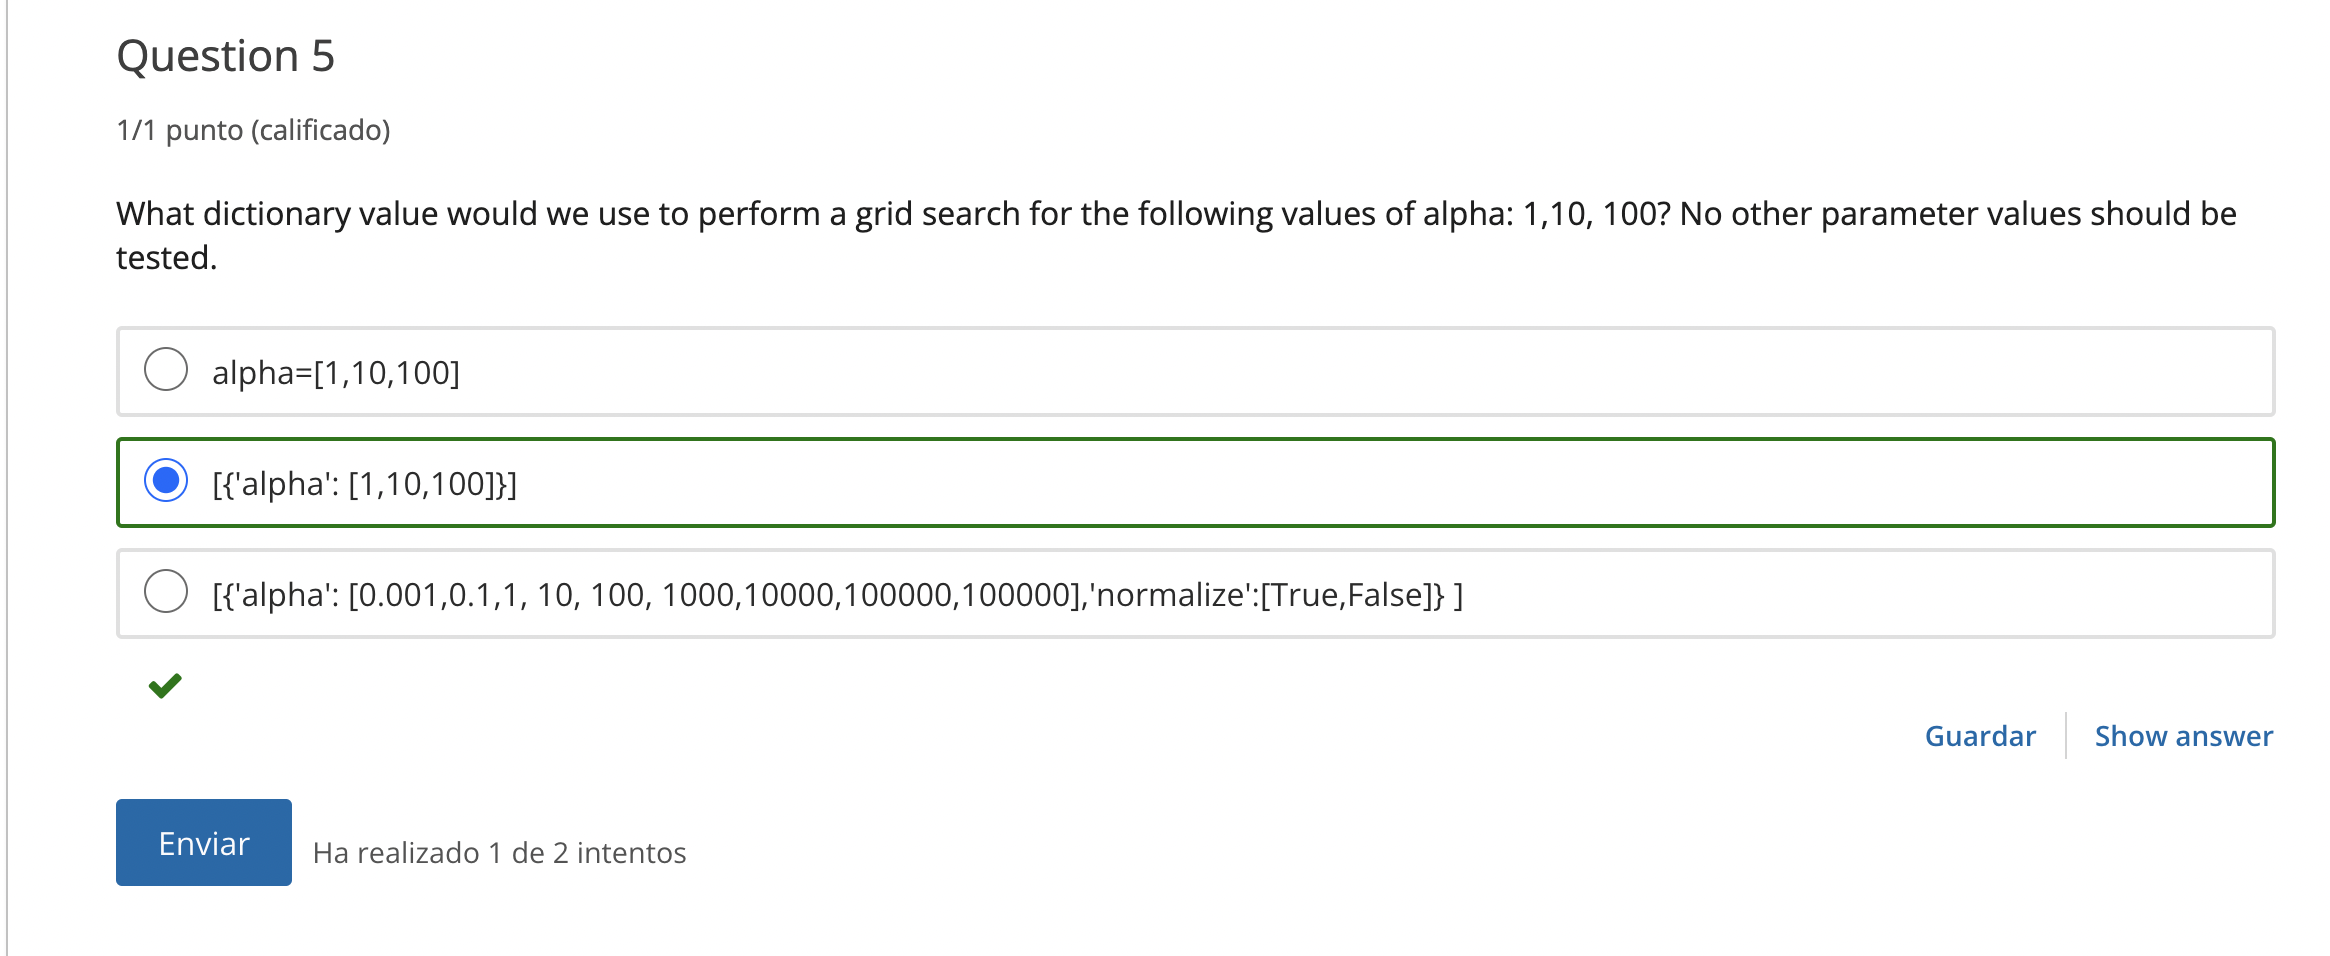